In [193]:
import pandas as pd
import plotly as pt
import plotly.express as px
import plotly.graph_objs as go
import re
from plotly.subplots import make_subplots
import seaborn as sns
from numpy import cov
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import spearmanr

In [110]:
# LOAD DATASETS
ctcovid = pd.read_csv("data/CTCOVID/Tests, Cases, Deaths by Town 7-13.csv", index_col=0)
hns = pd.read_csv("data/HNS/April 2020 HNS Passenger Comparison (p2).csv", index_col=0)
cicomp = pd.read_csv("data/DataHaven/(p38-42) CI Components by Location.csv", index_col=0)
cicomp.columns = [col.lower() for col in cicomp]
cicomp.columns = [col.replace(" ", "_") for col in cicomp]
cicomp.rename(columns={'town(s)': 'towns'}, inplace=True)

In [111]:
date = '07/12/2020'
day = ctcovid[ctcovid['last_update_date'] == date].reset_index(drop=True).sort_values(by=['total_cases'])
towns = day['town']
fig = go.Figure()
fig.add_trace(go.Bar(x=towns, y=day['total_cases'],
             name='Total Cases'))
# fig.add_trace(go.Bar(x=towns, y=day['confirmed_cases'],
#              name='Confirmed Cases'))
# fig.add_trace(go.Bar(x=towns, y=day['probable_cases'],
#              name='Probable Cases'))
fig.add_trace(go.Bar(x=towns, y=day['case_rate'],
             name='Case Rate (per 100k people)'))
fig.update_layout(title='Cases Type by Town on ' + date, showlegend=True)
fig.show()

In [112]:
nh = ctcovid[ctcovid['town'] == 'New Haven'][['last_update_date', 'total_cases']]
st = ctcovid[ctcovid['town'] == 'Stamford'][['last_update_date', 'total_cases']]
ha = ctcovid[ctcovid['town'] == 'Hartford'][['last_update_date', 'total_cases']]

nh = nh.reset_index(drop=True)
st = st.reset_index(drop=True)
ha = ha.reset_index(drop=True)

nh.rename(columns={'total_cases': 'nh_total_cases'}, inplace=True)
st.rename(columns={'total_cases': 'st_total_cases'}, inplace=True)
ha.rename(columns={'total_cases': 'ha_total_cases'}, inplace=True)

temp = pd.merge(nh, st, on='last_update_date')
hns_cases = pd.merge(temp, ha, on='last_update_date')

hns_cases_plot = px.line(hns_cases, x='last_update_date',
                 y=['nh_total_cases','st_total_cases','ha_total_cases'], 
                 title='HNS Total Cases 3/24/2020 to Present')
hns_cases_plot.update_xaxes(rangeslider_visible=True)
hns_cases_plot.show()

In [113]:
target_counties = ['Fairfield', 'Hartford', 'New Haven']
target_towns = ['STAMFORD & GREENWICH', 'HARTFORD', 'NEW HAVEN']
cicomp_smol = cicomp[cicomp['county'].isin(target_counties)] 
cicomp_hns = cicomp_smol[cicomp_smol['towns'].isin(target_towns)] 

In [114]:
cicomp_hns.reset_index(drop=True, inplace=True)
cicomp_hns.drop('township_code', axis=1, inplace=True)
# cicomp_hns.drop('unnamed:_8', axis=1, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [115]:
commute = cicomp_hns[cicomp_hns['components'] == 'Workers w/ short commute']
commute.reset_index(drop=True, inplace=True)
unem = cicomp_hns[cicomp_hns['components'] == 'Unemployment rate']
unem.reset_index(drop=True, inplace=True)

In [116]:
fig = go.Figure()
fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Bar(x=commute.towns, y=commute.white,
             name='White'), row=1, col=1)
fig.add_trace(go.Bar(x=commute.towns, y=commute.black,
             name='Black'), row=1, col=1)
fig.add_trace(go.Bar(x=commute.towns, y=commute.latino,
             name='Latino'), row=1, col=1)
fig.add_trace(go.Bar(x=commute.towns, y=commute.asian,
             name='Asian'), row=1, col=1)

fig.update_layout(title='Workers with Short Commute (by Race)', showlegend=True)
fig.show()

In [117]:
fig.add_trace(go.Bar(x=unem.towns, y=unem.white,
             name='White'), row=1, col=2)
fig.add_trace(go.Bar(x=unem.towns, y=unem.black,
             name='Black'), row=1, col=2)
fig.add_trace(go.Bar(x=unem.towns, y=unem.latino,
             name='Latino'), row=1, col=2)
fig.add_trace(go.Bar(x=unem.towns, y=unem.asian,
             name='Asian'), row=1, col=2)

fig.update_layout(title='Workers with Short Commute / Unemployment Rate (by Race)', showlegend=True)
fig.show()

In [118]:
stops = pd.read_csv("data/Bus Stops/CT_Transit_Hartford__New_Haven__New_Britain_Area_Route_Bus_Stops.csv")
hartford_stops = pd.read_csv("data/Bus Stops/Hartford-Bus-Stops.csv")
cicomp_smol = cicomp[cicomp['county'].isin(target_counties)] 

In [119]:
mapbox_access_token = open(".mapbox_token").read()

lat = stops.stop_lat
lon = stops.stop_lon
names = stops.stop_name

fig = go.Figure()
fig.add_trace(go.Scattermapbox(
        lat=lat,
        lon=lon,
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=17,
            color='rgb(255, 0, 0)',
            opacity=0.4
        ),
        text=names,
        hoverinfo='text'
    ))

fig.update_layout(
    title='Bus Stops',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=41.515629, 
            lon=-72.822977
        ),
        pitch=0,
        zoom=8,
        style='light'
    ),
)

fig.show()

In [120]:
ctrail = pd.read_csv("data/temp.csv")
ctrail = ctrail.drop(141)

In [121]:
rail_dates = pd.to_datetime(ctrail.Date, format='%m/%d/%y', errors='coerce')
covid_dates = pd.to_datetime(ctcovid.last_update_date, format='%m/%d/%Y', errors='coerce')
ctrail['date'] = rail_dates
ctcovid['date'] = covid_dates
ctrail.drop('Date', axis=1, inplace=True)
ctcovid.drop(['Unnamed: 0', 'last_update_date'], axis=1, inplace=True)

In [123]:
ctcovid_less = ctcovid[['town_number', 'town', 'total_cases', 'total_deaths', 'date']]
ctrail_less = ctrail[ctrail['date'] >= '2020-03-24']
ctrail_less = ctrail_less[ctrail_less['date'] <= '2020-07-12']
joined = pd.merge(ctrail_less, ctcovid_less, on='date')


In [159]:
nh_cc = joined[joined["town"] == "New Haven"]
nh_cc = nh_cc.reset_index(drop=True)

target_towns = ['Hartford', 'Stamford', 'New Haven']
hns_cc = joined[joined['town'].isin(target_towns)] 
hns_cc = hns_cc.reset_index(drop=True)

In [152]:
nh_cc['new_cases'] = nh_cc['total_cases'].shift(0) - nh_cc['total_cases'].shift(1)
nh_cc['new_cases'][0] = 0

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



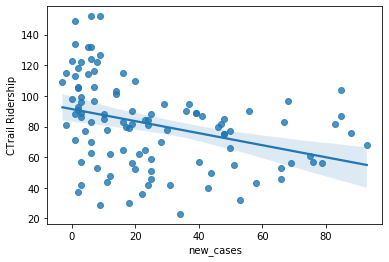

In [155]:
sns.regplot(x='new_cases', y='CTrail Ridership', data=nh_cc)

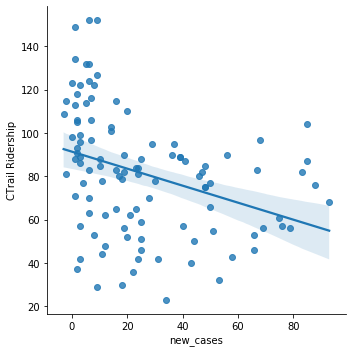

In [158]:
# iris = sns.load_dataset("iris")
# iris
# Plot sepal width as a function of sepal_length across days
g = sns.lmplot(x="new_cases", y="CTrail Ridership",
               height=5, data=nh_cc)

In [161]:
import statsmodels.api as sm
from sklearn import datasets

In [163]:
data = datasets.load_boston()
df = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.DataFrame(data.target, columns=["MEDV"])

In [165]:
target

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [185]:
cases = nh_cc['total_cases']
riders = nh_cc['CTrail Ridership']
cov(cases, riders)
pcorr, _ = pearsonr(cases, riders)
scorr, _ = spearmanr(cases, riders)
scorr, pcorr

(0.39139221080385567, 0.2736106528856274)